In [1252]:
from operator import xor
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

import prediccion

df = pd.read_csv('diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.00,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.00,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74


## Informacion de los Datos <br>
Descripción
Conjunto de datos que contiene los precios y otros atributos de casi 54.000 diamantes. Las variables son las siguientes:

Formato
Un dataframe con 53940 filas y 10 variables:

Price (precio)
precio en dólares estadounidenses (\$326-\$18.823)

Carat (quilate)
peso del diamante (0,2-5,01)

Cut (talla)
calidad de la talla (Fair/regular, Good/buena, Very Good/muy buena, Premium/superior, Ideal)

color
color del diamante, de D (mejor) a J (peor)

Clarity (claridad)
medida de la claridad del diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))

x
longitud en mm (0-10,74)

y
anchura en mm (0-58,9)

z
profundidad en mm (0-31,8)

Depth (profundidad)
porcentaje de profundidad total = z / media(x, y) = 2 * z / (x + y) (43-79)

Table (tabla)
anchura de la parte superior del diamante en relación con el punto más ancho (43-95)


#### Detalles estadísticos del conjunto de datos:

In [1253]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


#### Comprobar valores faltantes

In [1254]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

## ¿Que es lo que buscamos predecir?
Lo que se busca predecir es el precio del diamante. Se entiende que el precio esta determinado segun las caracteristicas que el diamante posea.
Por lo tanto el precio va a ser la variable dependiente mientras que el resto van a ser las independientes.


## Separacion de variables dependientes de las independientes ##
Primero establecemos las variables independientes<br>


In [1255]:
X= df.loc[:,['carat','cut','color','clarity','depth','table','x','y','z']]
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.00,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74


Por ultimo la variable dependiente

In [1256]:
Y= df.loc[:,['price']]
Y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


# De categoricos a valores dummies numericos <br>
Ya de antemano contamos con variables independientes categoricos.<br>
El siguiente paso es convertir los datos de aquellas columnas en datos numericos <br>
Las variables independientes categoricas son

In [1257]:
columnasNoNumericas = X.select_dtypes(exclude=['number'])
columnasNoNumericas = columnasNoNumericas.columns.tolist()
columnasNoNumericas

['cut', 'color', 'clarity']

Las variables categóricas, como la talla (Cut), el color (Color) y la claridad (Clarity), se podrian ver  beneficiados de la codificación one-hot, que implica crear variables dummy para cada categoría en lugar de escalar los datos. La razón principal es que estas variables no tienen un orden inherente y no se puede establecer una relación numérica directa entre las diferentes categorías.

In [1258]:

onehotencoder = make_column_transformer((OneHotEncoder(), columnasNoNumericas), remainder = "passthrough")
X = onehotencoder.fit_transform(X)
#chequeamos el resultado observando una porción
pd.concat([pd.DataFrame(X),df.iloc[:, :-1]], axis=1).head()



,0,1,2,3,4,5,6,7,8,9,...,25,carat,cut,color,clarity,depth,table,price,x,y
0,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,2.43,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98
1,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,2.31,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84
2,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,2.31,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07
3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.63,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.75,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35


A continuación, dividimos el 80% de los datos para el conjunto de entrenamiento y  el 20% de los datos al conjunto de pruebas usando el código de abajo.

In [1259]:
prediccion = prediccion.Prediccion(X,Y) ## 
prediccion.divisionDeConjuntos()
prediccion.X_train.shape


#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

(43152, 26)

In [1260]:
prediccion.X_test.shape

(10788, 26)

In [1261]:
prediccion.y_test.shape

(10788, 1)

In [1262]:
prediccion.y_train.shape

(43152, 1)

#### Entrenamiento

Ahora vamos a entrenar nuestro modelo

In [1263]:

prediccion.entrenar()


#### Predicción sobre los datos de la prueba

In [1264]:
prediccion.prediccion()

array([4918.84375  , 7600.2421875, 6144.96875  , ..., 5267.7265625,
       6974.3359375, 2317.140625 ])

# Resultados de la prediccion <br>
## Datos sobre columnas adicionales
* Diferencia = la diferencia numerica entre el dato real y su prediccion <br>
* Diferencia porcentual % = La diferencia entre el dato real y su prediccion  en terminos porcentuales. Este campo puede superar el 100% si la diferencia es muy grande<br>
* Eficacia de prediccion% = indica el porcentaje de acierto que hay entre la prediccion y el dato real. En esta columna cuanto mayor es el numero mejor<br>
* Error porcentual de prediccion% = indica porcentualmente que tan lejos se estubo de acertar la prediccion. En esta columna cuanto MENOR es el numero mejor. Para este caso en particular el campo no supera nunca el 100% . Si la diferencia porcentual es muy alta entonces el error porcentual de prediccion puede acercarse demasiado al 100%

In [1265]:
prediccion.resultadoDeEntrenamiento()

,Actual,Prediccion,Diferencia,Diferencia porcentual %,Eficacia de prediccion %,Error porcentual de prediccion %
0,4733,4918.84,185.84,3.93,96.07,3.93
1,6424,7600.24,1176.24,18.31,81.69,18.31
2,5510,6144.97,634.97,11.52,88.48,11.52
3,8770,10299.15,1529.15,17.44,82.56,17.44
4,4493,5240.91,747.91,16.65,83.35,16.65
...,...,...,...,...,...,...
10783,1289,1126.23,162.77,12.63,87.37,12.63
10784,3435,3521.10,86.10,2.51,97.49,2.51
10785,3847,5267.73,1420.73,36.93,63.07,36.93
10786,8168,6974.34,1193.66,14.61,85.39,14.61


Analicemos el ultimo caso que se muestra. Vemos que el valor real  del precio del diamante es de  $1917  y su prediccion fue del 2317.14. Osea que dando una diferencia del 20.87% entre ambos (lo cual no es tan malo) significando una eficacia en la prediccion del 79.13% con lo cual concluimos para este caso que le falto un 20.87%.
<Br>
El primer caso da un mejor numero dandonos un resultado de prediccion de un 96.07%


Veamos una comparativa grafica del valor real vs la prediccion

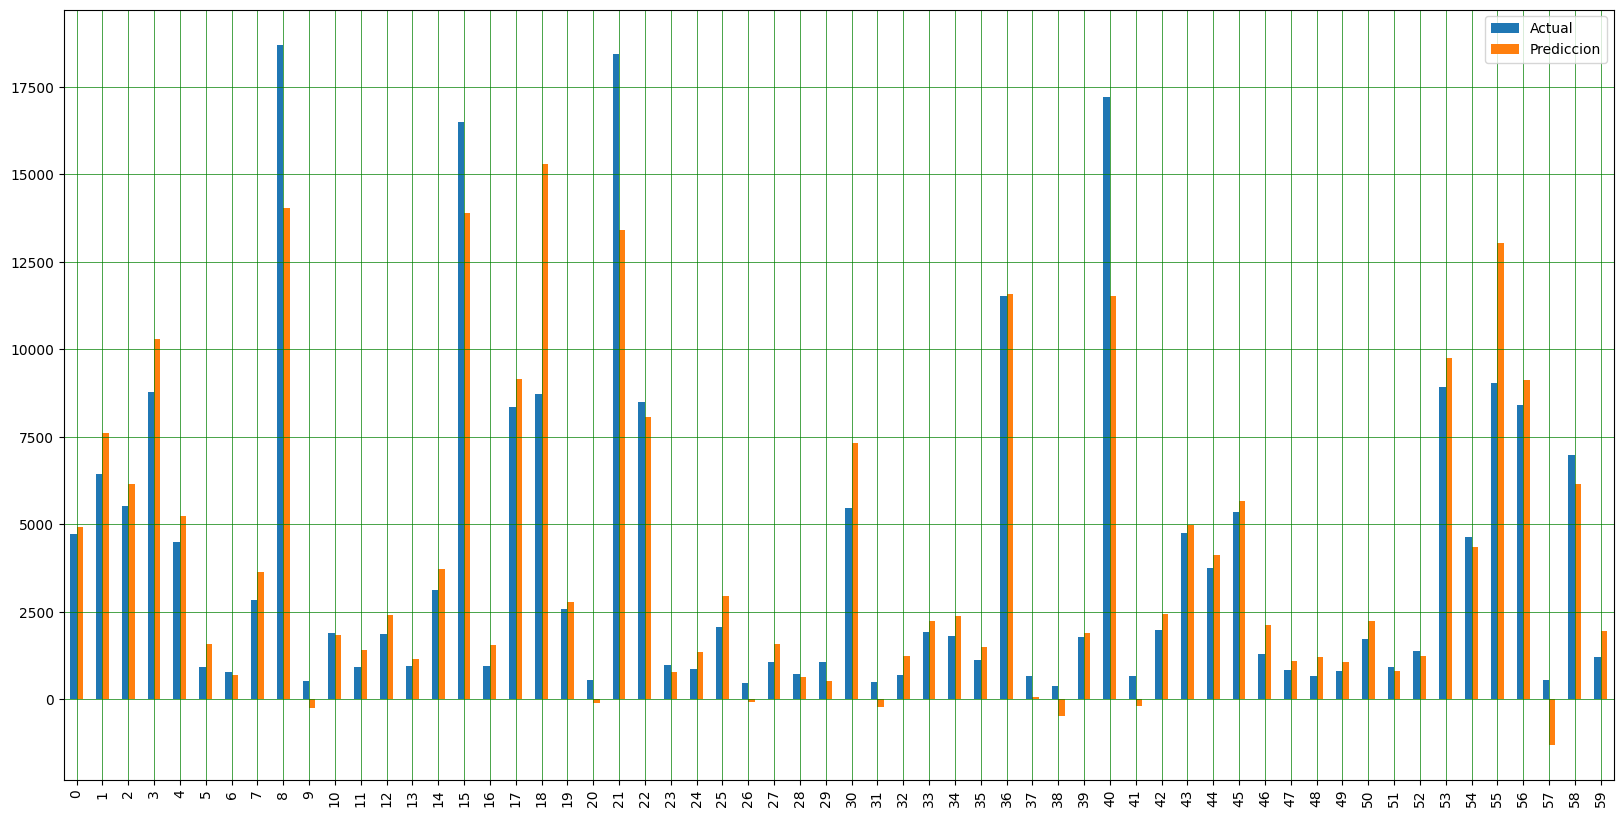

In [1266]:
prediccion.graficoActualPrediccion()

In [1267]:
prediccion.resultadoDeEntrenamiento().describe()

,Actual,Prediccion,Diferencia,Diferencia porcentual %,Eficacia de prediccion %,Error porcentual de prediccion %
count,10788.00,10788.00,10788.00,10788.00,10788.00,10788.00
mean,3929.21,3914.52,737.17,39.35,69.71,30.29
std,3981.60,3816.05,839.87,65.30,28.56,28.56
min,326.00,-3549.88,0.05,0.01,0.09,0.01
25%,947.50,1038.07,259.21,9.17,58.80,9.17
50%,2398.00,2832.98,531.65,20.17,79.83,20.17
75%,5311.25,5895.95,879.28,41.20,90.83,41.20
max,18787.00,31561.83,14232.83,896.91,99.99,99.91


Analizando la fila Mean concluimos que nuestro algoritmo en promedio fue efectivo en un 69.71% lo que no es  un numero demasiado malo pero quizas se podria mejorar . 
Tambien podemos sacar otras conclusiones como por ejemplo que aquel juego que tubo un mejor acierto en su prediccion dio en un 99.99% de acierto pero el peor caso dio un 0.09% en prediccion por lo que la diferencia entre el valor real y el predecido fue muy alto.<Br>


In [1268]:
import statsmodels.api as sm
SL = 0.05
X_Aux = X

In [1269]:
def pDeterminacion():
    global Y
    global X_Aux
    regression_OLS = sm.OLS(endog = Y, exog = X_Aux).fit()
    # observar el p valor en el sumario
    return regression_OLS.summary()

pDeterminacion()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        15:13:04   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1879.3054    178.936     10.503      0.000    1528.589    2230.022
x2          2459.0569    171.813     14.312      0.000    2122.302    2795.812
x3          2712.2173    164.041     16.534      0.000    2390.696    3033.739
x4          2641.4494    168.050     15.718      0.000    2312.070    2970.828
x5          2606.0880    168.145     15.499      0.000    2276.522    2935.654
x6          2582.5767    121.593     21.239      0.000    2344.253    2820.900
x7          2373.4586    121.410     19.549      0.000    2135.494    2611.423
x8          2309.7229    121.553     19.002      0.000    2071.478    2547.967
x9          2100.5378    121.660     17.266      0.000    1862.083    2338.993
x10         1602.3100    121.825     13.153      0.000    1363.533    1841.087
x11         1116.3322    122.072      9.145      0.000     877.069    1355.595
x12          213.1786    122.775      1.736      0.083     -27.461     453.818
x13        -2277.4048    114.088    -19.962      0.000   -2501.019   -2053.791
x14         3067.6975    107.370     28.571      0.000    2857.251    3278.144
x15         1388.0673    107.347     12.931      0.000    1177.667    1598.468
x16          425.1815    107.310      3.962      0.000     214.852     635.511
x17         2300.9931    106.637     21.578      0.000    2091.984    2510.002
x18         1989.8188    106.800     18.631      0.000    1780.490    2199.147
x19         2730.3543    106.588     25.616      0.000    2521.441    2939.267
x20         2673.4093    106.607     25.077      0.000    2464.458    2882.361
x21         1.126e+04     48.628    231.494      0.000    1.12e+04    1.14e+04
x22          -63.8061      4.535    -14.071      0.000     -72.694     -54.918
x23          -26.4741      2.912     -9.092      0.000     -32.181     -20.767
x24        -1008.2611     32.898    -30.648      0.000   -1072.741    -943.781
x25            9.6089     19.333      0.497      0.619     -28.284      47.502
x26          -50.1189     33.486     -1.497      0.134    -115.752      15.515
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     7.00e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.92e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""